In [20]:
# pip install imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

pd.options.display.max_rows = 5

In [21]:
df_mitbih_train = pd.read_csv('input/mitbih_train.csv', header=None)
df_mitbih_test  = pd.read_csv('input/mitbih_test.csv', header=None)
print(df_mitbih_train.shape, df_mitbih_test.shape)

# 187 column looks like a target column. We already see the skewiness  
df_mitbih_train.rename(columns={187: 'class'}, inplace=True)
df_mitbih_test.rename(columns={187: 'class'}, inplace=True)

df_mitbih_train

(87554, 188) (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [22]:
# There are no NaNs 

df_mitbih_train.isnull().sum(axis=0).sum(), df_mitbih_test.isnull().sum(axis=0).sum()

(np.int64(0), np.int64(0))

In [23]:
# No duplicated data

print(f"Duplicated values in train data: {df_mitbih_train.duplicated().sum()}")
print(f"Duplicated values in test data: {df_mitbih_test.duplicated().sum()}")

Duplicated values in train data: 0
Duplicated values in test data: 0


In [24]:
# The Class target looks like categorical rather than ordinal data. So convert 

id_to_label = { 
    0: "Normal",
    1: "Supraventricular Arrhythmia",
    2: "Ventricular Arrhythmia",
    3: "Ventricular-Normal Fusion",
    4: "Paced-Normal Fusion" }


df_mitbih_train['class'] = df_mitbih_train['class'].replace(id_to_label)
df_mitbih_test['class']  = df_mitbih_test['class'].replace(id_to_label)

In [25]:
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0).reset_index(drop=True)
df_mitbih

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paced-Normal Fusion
109445,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paced-Normal Fusion


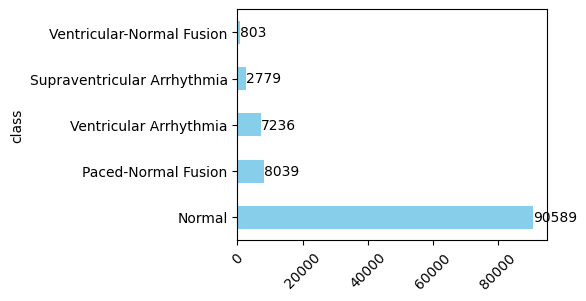

In [26]:
# Data is very skewed: Train + Test data 

plt.figure(figsize=(4,3)) 
df_mitbih['class'].value_counts().plot(kind='barh', color='skyblue')
plt.xticks(rotation=45);

for index, value in enumerate(df_mitbih['class'].value_counts()):
    plt.text(value, index, str(value), va='center'); 

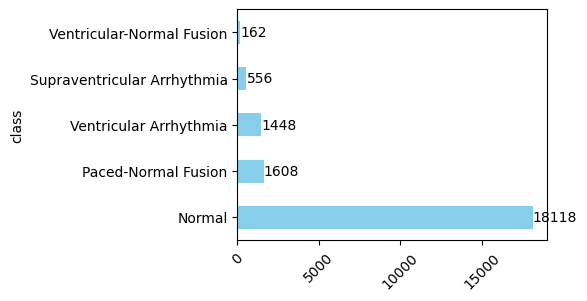

In [27]:
# Test data 

plt.figure(figsize=(4,3)) 
df_mitbih_test['class'].value_counts().plot(kind='barh', color='skyblue')
plt.xticks(rotation=45);

for index, value in enumerate(df_mitbih_test['class'].value_counts()):
    plt.text(value, index, str(value), va='center'); 

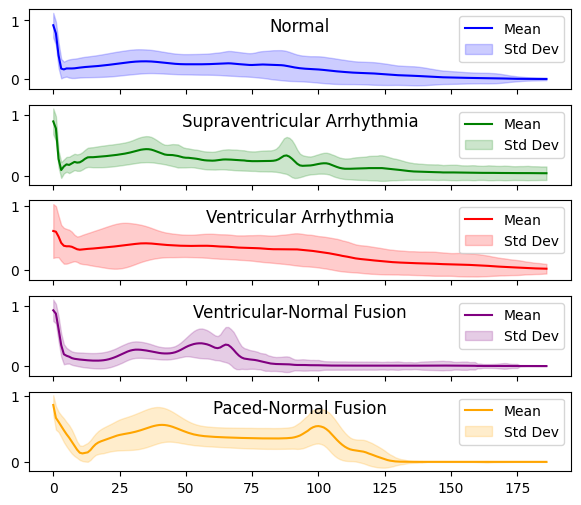

In [28]:
# For each of the category, let's plot the mean and std values, not to plot the whole cohort

categories = id_to_label.values()

fig, axs = plt.subplots(len(categories), figsize=(7, 6), sharex=True)
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, (category, color) in enumerate(zip(categories, colors)):
    to_plot = df_mitbih.loc[df_mitbih['class'] == category, :186]
    mean_values = to_plot.mean()
    std_values = to_plot.std()

    axs[i].plot(mean_values, label='Mean', color=color)
    axs[i].fill_between(range(len(mean_values)), 
                        mean_values - std_values, 
                        mean_values + std_values, 
                        color=color, alpha=0.2, label='Std Dev')
    axs[i].set_title(f'{category}', y=0.8, va="top"); axs[i].legend(); 

In [29]:
# Apply oversampling only to the train data, and not to the test data

X = df_mitbih_train .drop(columns=['class'])
y = df_mitbih_train['class']

# 20% of the Normal (biggest) class
sampling_strategy = {
    "Normal":                      int(y.value_counts()["Normal"]),  
    "Supraventricular Arrhythmia": int(y.value_counts()["Normal"] * 0.2), 
    "Ventricular Arrhythmia":      int(y.value_counts()["Normal"] * 0.2),      
    "Ventricular-Normal Fusion":   int(y.value_counts()["Normal"] * 0.2),   
    "Paced-Normal Fusion":         int(y.value_counts()["Normal"] * 0.2)   }


smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['class'] = y_resampled

df_resampled

C:\Users\kubey\AppData\Local\Temp\ipykernel_19164\1632457338.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['class'] = y_resampled


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130445,0.967289,1.000000,0.638967,0.361451,0.202603,0.164612,0.134823,0.122892,0.106252,0.109416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ventricular-Normal Fusion
130446,1.000000,0.932730,0.699869,0.362576,0.146003,0.137293,0.131825,0.102093,0.089027,0.082466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ventricular-Normal Fusion


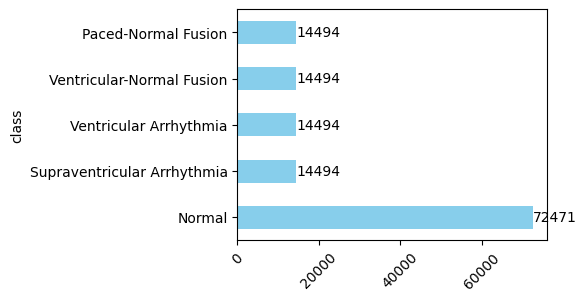

In [30]:
plt.figure(figsize=(4,3)) 
df_resampled['class'].value_counts().plot(kind='barh', color='skyblue')
plt.xticks(rotation=45);

for index, value in enumerate(df_resampled['class'].value_counts()):
    plt.text(value, index, str(value), va='center'); 

In [31]:
# Compare to the original
df_mitbih_train['class'].value_counts(dropna=False) 

class
Normal                         72471
Paced-Normal Fusion             6431
Ventricular Arrhythmia          5788
Supraventricular Arrhythmia     2223
Ventricular-Normal Fusion        641
Name: count, dtype: int64

In [32]:
if True: 
    df_resampled.to_csv('input/mitbih_train_resampled.csv', index=False)
    df_mitbih_test.to_csv('input/mitbih_test_renamed.csv',  index=False)

### Another option is to augment data is to use Generative Adversarial Network (GAN) on the traindata. I have experience using CTGAN, and it provided a great improvement of the model performance. 

# Create an image data

In [50]:
import os
from PIL import Image

In [62]:
df_resampled   = pd.read_csv('input/mitbih_train_resampled.csv')
df_mitbih_test = pd.read_csv('input/mitbih_test_renamed.csv') 

In [63]:
df_resampled 

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130445,0.967289,1.000000,0.638967,0.361451,0.202603,0.164612,0.134823,0.122892,0.106252,0.109416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ventricular-Normal Fusion
130446,1.000000,0.932730,0.699869,0.362576,0.146003,0.137293,0.131825,0.102093,0.089027,0.082466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ventricular-Normal Fusion


In [64]:
df_resampled_part = df_resampled.drop(columns=['class']).iloc[:3, :].copy()

path_images_train = 'input/images/train'
os.makedirs(path_images_train, exist_ok=True)

for index, row in df_resampled_part.iterrows():
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(row)), row, linestyle='-', color='black')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.savefig(os.path.join(path_images_train, f'{index}.png'))
    plt.close()   

In [65]:
df_mitbih_test_part = df_mitbih_test.drop(columns=['class']).iloc[:3, :].copy()

path_images_test = 'input/images/test'
os.makedirs(path_images_test, exist_ok=True)

for index, row in df_mitbih_test_part.iterrows():
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(row)), row, linestyle='-', color='black')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.savefig(os.path.join(path_images_test, f'{index}.png'))
    plt.close()  

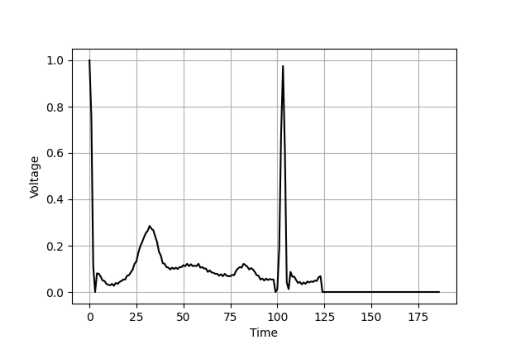

In [66]:
# For example, this is an image file 

image_files = [f for f in os.listdir(path_images_test) if f.endswith('.png')]
image_file = image_files[0]


image_path = os.path.join(path_images_test, image_file)
image = Image.open(image_path)

plt.imshow(image); plt.axis('off'); 

# Image and Text data for Visual-Language LLM models

In [ ]:
df_train = pd.read_csv('input/mitbih_train_resampled.csv', usecols=['class'])
df_test  = pd.read_csv('input/mitbih_test_renamed.csv', usecols=['class']) 

df_train['image'] = None
df_test['image']  = None

df_train

,class,image
0,Normal,None
1,Normal,None
...,...,...
130445,Ventricular-Normal Fusion,None
130446,Ventricular-Normal Fusion,None


In [ ]:
path_images_train = 'input/images/train'
path_images_test  = 'input/images/test'

for index in df_train.index:
    image_file = f'{index}.png'
    image_path = os.path.join(path_images_train, image_file)
    image = Image.open(image_path)
    image_rgb = image.convert('L') # Grey scale
    df_train.loc[index, 'image'] = image_rgb


for index in df_test.index:
    image_file = f'{index}.png'
    image_path = os.path.join(path_images_test, image_file)
    image = Image.open(image_path)
    image_rgb = image.convert('L') # Grey scale
    df_test.loc[index, 'image'] = image_rgb    
  

FileNotFoundError: [Errno 2] No such file or directory: 'input/images/train\\3.png'

In [77]:
df_train

,class,image
0,Normal,<PIL.Image.Image image mode=L size=600x400 at ...
1,Normal,<PIL.Image.Image image mode=L size=600x400 at ...
...,...,...
130445,Ventricular-Normal Fusion,None
130446,Ventricular-Normal Fusion,None


In [59]:
instruction_user = """
You are a specialist Cardiologist specializing in the analysis of ECG (Electrocardiogram) signals.
Your goal is to analyze ECG signals and classify them accurately.
You only classify ECG signals into one of the following five categories: 
"Normal", "Supraventricular Arrhythmia", "Ventricular Arrhythmia", "Ventricular-Normal Fusion", "Paced-Normal Fusion".
Each ECG signal must be classified into exactly one of these categories.
No additional text should be included in the output.
You are provided with an ECG signal image to look into. It is Time (x-axis) vs Voltage (y-axis). 
Classify the ECG signal accurately by analyzing the provided data.
"""

def conversations(row):

   report_text = " ".join(["%s: %s" % (k, v) for k, v in row['report'].items() if v])

   conversation = [ {  "role": "user",
                     "content": [ {"type": "text", "text": instruction_user},
                                    {"type": "image", "image": row["image"]},],},

                    {  "role": "assistant",
                     "content": [{"type": "text", "text": report_text}]}]

   return {"messages": conversation}